In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
sys.path.append("..")
import keras_utils
import tqdm_utils

Using TensorFlow backend.


In [2]:
start_token = " "  # so that the network knows that we're generating a first token

# this is the token for padding,
# we will add fake pad token at the end of names 
# to make them of equal size for further batching
pad_token = "#"

with open("names") as f:
    names = f.read()[:-1].split('\n')
    names = [start_token + name for name in names]
print(names[::1000])

[' Abagael', ' Claresta', ' Glory', ' Liliane', ' Prissie', ' Geeta', ' Giovanne', ' Piggy']


max length: 16


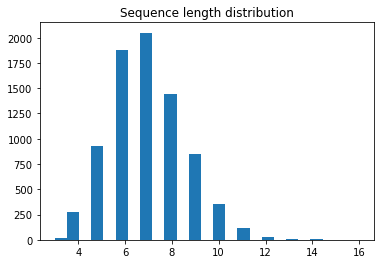

In [3]:
MAX_LENGTH = max(map(len, names))
print("max length:", MAX_LENGTH)

plt.title('Sequence length distribution')
plt.hist(list(map(len, names)), bins=25);

In [4]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(names)
name_seqs=tokenizer.texts_to_sequences(names)
print(name_seqs[::1000])

[[1, 18, 21, 3, 26, 3, 2, 7], [1, 19, 7, 3, 6, 2, 10, 9, 3], [1, 30, 7, 8, 6, 11], [1, 23, 4, 7, 4, 3, 5, 2], [1, 37, 6, 4, 10, 10, 4, 2], [1, 30, 2, 2, 9, 3], [1, 30, 4, 8, 32, 3, 5, 5, 2], [1, 37, 4, 26, 26, 11]]


In [5]:
tokenizer.word_index[""] = 0
print(tokenizer.word_index)
n_tokens = len(tokenizer.word_index) #56
print(n_tokens)

{' ': 1, 'e': 2, 'a': 3, 'i': 4, 'n': 5, 'r': 6, 'l': 7, 'o': 8, 't': 9, 's': 10, 'y': 11, 'd': 12, 'h': 13, 'u': 14, 'm': 15, 'M': 16, 'c': 17, 'A': 18, 'C': 19, 'S': 20, 'b': 21, 'D': 22, 'L': 23, 'R': 24, 'J': 25, 'g': 26, 'B': 27, 'T': 28, 'E': 29, 'G': 30, 'K': 31, 'v': 32, 'k': 33, 'H': 34, 'N': 35, 'F': 36, 'P': 37, 'f': 38, 'W': 39, 'p': 40, 'V': 41, 'w': 42, 'I': 43, 'O': 44, 'z': 45, 'Z': 46, 'x': 47, 'j': 48, 'q': 49, 'U': 50, '-': 51, 'Y': 52, 'Q': 53, 'X': 54, "'": 55, '': 0}
56


In [6]:
from keras.preprocessing import sequence
from keras.utils import to_categorical

to_matrix = sequence.pad_sequences(name_seqs, maxlen=16, padding="post")
yy = to_matrix[::2000]
print(yy)
print(to_matrix.shape)

yyy=[]
for i in range(to_matrix.shape[0]):
    y4 = to_categorical(to_matrix[i], 56)
    y4 = np.roll(y4, -1, axis=0)
    yyy.append(y4)
    
#print(yyy)
print(np.array(yyy).shape)
yyy = np.reshape(yyy, (7944,16,56))

[[ 1 18 21  3 26  3  2  7  0  0  0  0  0  0  0  0]
 [ 1 30  7  8  6 11  0  0  0  0  0  0  0  0  0  0]
 [ 1 37  6  4 10 10  4  2  0  0  0  0  0  0  0  0]
 [ 1 30  4  8 32  3  5  5  2  0  0  0  0  0  0  0]]
(7944, 16)
(7944, 16, 56)


In [22]:
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))

def print_on_epoch_end(epoch, yyy):
    sstr = ''
    for _ in range(5):
        probs = model.predict(np.reshape(to_matrix[np.random.randint(56)], [1,16]))
        probs = np.reshape(probs, (16,56))
        for i in range(16):
            indx = np.random.choice(n_tokens, p=probs[i])
            #print(indx)
            sstr = sstr + reverse_word_map[indx]
        print(sstr)
        sstr = ''


In [23]:
from keras.layers import Embedding, Dense, LSTM, TimeDistributed
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.callbacks import LambdaCallback

lstm_units = 64  # size of hidden state
embedding_size = 16 

model = Sequential()
model.add(Embedding(n_tokens, embedding_size, input_length=16))
model.add(LSTM(lstm_units, return_sequences=True))
model.add(TimeDistributed(Dense(n_tokens, activation = "softmax")))

optimizer = RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

print_callback = LambdaCallback(on_epoch_end = print_on_epoch_end)

model.fit(to_matrix, yyy, batch_size=32, epochs=50, callbacks = [print_callback])


Epoch 1/50
7936/7944 [============================>.] - ETA: 0s - loss: 1.6663guash  
einee 
qisbao
'zhlr  
Amaiyi 
7944/7944 [==============================] - 14s - loss: 1.6660    
Epoch 2/50
7936/7944 [============================>.] - ETA: 0s - loss: 1.3331arnaam
neesset 
zayrt
Qlltntr
DVatis
7944/7944 [==============================] - 13s - loss: 1.3330    
Epoch 3/50
7936/7944 [============================>.] - ETA: 0s - loss: 1.2381Cbiaee 
DrJs  
Crstrn   
iedenn 
Dobtnni 
7944/7944 [==============================] - 13s - loss: 1.2382    
Epoch 4/50
7936/7944 [============================>.] - ETA: 0s - loss: 1.1558Hrnnn 
Azeuaee 
astgle
ieesn 
Saretta 
7944/7944 [==============================] - 13s - loss: 1.1561    
Epoch 5/50
7936/7944 [============================>.] - ETA: 0s - loss: 1.1108Grrai 
Vomresr 
Miiahi 
Dvonita 
Trries 
7944/7944 [==============================] - 13s - loss: 1.1108    
Epoch 6/50
7936/7944 [============================>.] - ETA: 0s - loss: 1

7944/7944 [==============================] - 12s - loss: 0.8886    
Epoch 45/50
7936/7944 [============================>.] - ETA: 0s - loss: 0.8863Sdasins 
Trainh 
Nldrl 
Aleid 
Cnatu 
7944/7944 [==============================] - 12s - loss: 0.8863    
Epoch 46/50
7904/7944 [============================>.] - ETA: 0s - loss: 0.8838Lndse 
Lrnegu 
Mnimign 
Wwdgee 
Jvhilla 
7944/7944 [==============================] - 12s - loss: 0.8837    
Epoch 47/50
7936/7944 [============================>.] - ETA: 0s - loss: 0.8809Jbnsh 
Olblerle 
Vshl 
Jrola 
Lnhlo 
7944/7944 [==============================] - 12s - loss: 0.8808    
Epoch 48/50
7936/7944 [============================>.] - ETA: 0s - loss: 0.8803Llgeano 
Vnola 
Glaee 
Knase 
Crdboo 
7944/7944 [==============================] - 12s - loss: 0.8803    
Epoch 49/50
7904/7944 [============================>.] - ETA: 0s - loss: 0.8797HrinyaU 
Fdmitn 
Tnrale 
Bdrln 
Jlhlen 
7944/7944 [==============================] - 12s - loss: 0.8798    
Epo

In [25]:
probs = model.predict(np.reshape(to_matrix[np.random.randint(56)], [1,16]))
print(probs.shape)
probs = np.reshape(probs, (16,56))
#reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))
sstr = ''
for i in range(16):
    indx = np.random.choice(n_tokens, p=probs[i])
    #print(indx)
    sstr = sstr + reverse_word_map[indx]
    
#print(tokenizer.sequences_to_texts(indx))
print(sstr)

(1, 16, 56)
Bleuenne 


In [19]:
print(tokenizer.__dir__())

['word_counts', 'word_docs', 'filters', 'split', 'lower', 'num_words', 'document_count', 'char_level', 'word_index', 'index_docs', '__module__', '__doc__', '__init__', 'fit_on_texts', 'fit_on_sequences', 'texts_to_sequences', 'texts_to_sequences_generator', 'texts_to_matrix', 'sequences_to_matrix', '__dict__', '__weakref__', '__repr__', '__hash__', '__str__', '__getattribute__', '__setattr__', '__delattr__', '__lt__', '__le__', '__eq__', '__ne__', '__gt__', '__ge__', '__new__', '__reduce_ex__', '__reduce__', '__subclasshook__', '__init_subclass__', '__format__', '__sizeof__', '__dir__', '__class__']
